##### Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carregando DataSet Airliness Delay

In [ ]:
#link do Dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay
dados = pd.read_csv('airlines_delay.csv')

#Traduzindo nome das Variáveis
dados.rename({'Flight': 'Voo', 'Time': 'HoraPartida', 'Length': 'Duracao', 'Airline': 'CiaAerea', 'AirportFrom': 'AeroportoOrigem', 'AirportTo': 'AeroportoDestino', 'DayOfWeek': 'DiaDaSemana', 'Class': 'Atrasado'}, axis=1, inplace=True)

Verificando shape do dataset

In [ ]:
print('Há %s linhas e %s colunas presentes neste DataSet' % (dados.shape[0], dados.shape[1]))

Há 539382 linhas e 8 colunas presentes neste DataSet


Verificando os 10 primeiros registros

In [ ]:
dados.head(10)

,Voo,HoraPartida,Duracao,CiaAerea,AeroportoOrigem,AeroportoDestino,DiaDaSemana,Atrasado
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0
5,3692.0,580.0,60.0,WN,MSY,BHM,4,0
6,1135.0,690.0,239.0,CO,EWR,DFW,4,0
7,1300.0,1210.0,80.0,AA,DFW,MEM,3,0
8,587.0,1295.0,105.0,FL,BWI,GRR,7,0
9,764.0,530.0,108.0,FL,ATL,PBI,3,0


Resumo estatistico dos campos numéricos

In [ ]:
dados.describe()

,Voo,HoraPartida,Duracao,DiaDaSemana,Atrasado
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


Resumo estatistico dos campos categóricos

In [ ]:
dados.describe(include='O')

,CiaAerea,AeroportoOrigem,AeroportoDestino
count,539382,539382,539382
unique,18,293,293
top,WN,ATL,ATL
freq,94097,34449,34440


Vericando as informações basicas sobre o DataFrame

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Voo               539382 non-null  float64
 1   HoraPartida       539382 non-null  float64
 2   Duracao           539382 non-null  float64
 3   CiaAerea          539382 non-null  object 
 4   AeroportoOrigem   539382 non-null  object 
 5   AeroportoDestino  539382 non-null  object 
 6   DiaDaSemana       539382 non-null  int64  
 7   Atrasado          539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


Verificando valores nulos ou faltantes no DataSet

In [ ]:
print('Contagem de valores faltantes para cada coluna do dataset')
dados.isna().sum()

Contagem de valores faltantes para cada coluna do dataset


Voo                 0
HoraPartida         0
Duracao             0
CiaAerea            0
AeroportoOrigem     0
AeroportoDestino    0
DiaDaSemana         0
Atrasado            0
dtype: int64

In [ ]:
print('Contagem de valores nulos para cada coluna do dataset')
dados.isnull().sum()

Contagem de valores nulos para cada coluna do dataset


Voo                 0
HoraPartida         0
Duracao             0
CiaAerea            0
AeroportoOrigem     0
AeroportoDestino    0
DiaDaSemana         0
Atrasado            0
dtype: int64

In [ ]:
#Sem dados nulos ou faltantes

Verificando possíveis outliers na base

<Axes: >

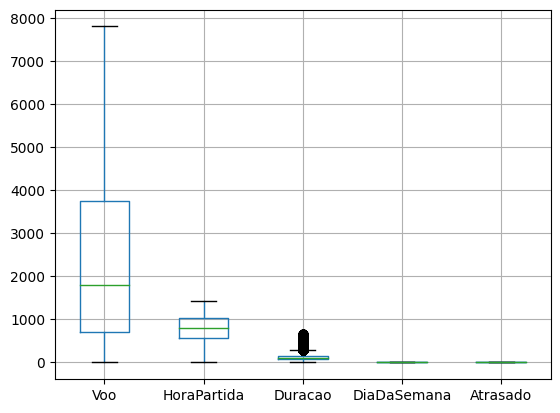

In [ ]:
dados.boxplot()

Distribuição de frequência de todas as variáveis (frequência e porcentagem)

In [ ]:
frequencia_hpartida = pd.DataFrame(dados['HoraPartida'].value_counts().sort_values(ascending=False))
frequencia_hpartida = frequencia_hpartida.rename(columns={'HoraPartida': 'Frequência'})
frequencia_hpartida['Frequência (%)'] = ((dados['HoraPartida'].value_counts() /  dados['HoraPartida'].count()) * 100).round(2)
frequencia_hpartida.columns.name = 'HoraPartida'
frequencia_hpartida.head(10)

HoraPartida,Frequência,Frequência (%)
360.0,10784,2.00
420.0,6644,1.23
390.0,4279,0.79
480.0,4058,0.75
450.0,3804,0.71
540.0,3723,0.69
510.0,3700,0.69
1020.0,3459,0.64
660.0,3319,0.62
990.0,3158,0.59


In [ ]:
frequencia_duracao = pd.DataFrame(dados['Duracao'].value_counts().sort_values(ascending=False))
frequencia_duracao = frequencia_duracao.rename(columns={'Duracao': 'Frequência'})
frequencia_duracao['Frequência (%)'] = ((dados['Duracao'].value_counts() /  dados['Duracao'].count()) * 100).round(2)
frequencia_duracao.columns.name = 'Duracao'
frequencia_duracao

Duracao,Frequência,Frequência (%)
80.0,13338,2.47
70.0,13086,2.43
65.0,11894,2.21
85.0,11840,2.20
75.0,11813,2.19
...,...,...
457.0,2,0.00
481.0,2,0.00
418.0,2,0.00
417.0,2,0.00


In [ ]:
frequencia_CiaAerea = pd.DataFrame(dados['CiaAerea'].value_counts().sort_values(ascending=False))
frequencia_CiaAerea = frequencia_CiaAerea.rename(columns={'CiaAerea': 'Frequência'})
frequencia_CiaAerea['Frequência (%)'] = ((dados['CiaAerea'].value_counts() /  dados['CiaAerea'].count()) * 100).round(2)
frequencia_CiaAerea.columns.name = 'CiaAerea'
frequencia_CiaAerea

CiaAerea,Frequência,Frequência (%)
WN,94097,17.45
DL,60940,11.30
OO,50254,9.32
AA,45656,8.46
MQ,36604,6.79
US,34500,6.40
XE,31126,5.77
EV,27983,5.19
UA,27619,5.12
CO,21118,3.92


In [ ]:
frequencia_origem = pd.DataFrame(dados['AeroportoOrigem'].value_counts().sort_values(ascending=False))
frequencia_origem = frequencia_origem.rename(columns={'AeroportoOrigem': 'Frequência'})
frequencia_origem['Frequência (%)'] = ((dados['AeroportoOrigem'].value_counts() /  dados['AeroportoOrigem'].count()) * 100).round(2)
frequencia_origem.columns.name = 'AeroportoOrigem'
frequencia_origem

AeroportoOrigem,Frequência,Frequência (%)
ATL,34449,6.39
ORD,24822,4.60
DFW,22153,4.11
DEN,19843,3.68
LAX,16657,3.09
...,...,...
MMH,16,0.00
SJT,15,0.00
GUM,10,0.00
ADK,9,0.00


In [ ]:
frequencia_destino = pd.DataFrame(dados['AeroportoDestino'].value_counts().sort_values(ascending=False))
frequencia_destino = frequencia_destino.rename(columns={'AeroportoDestino': 'Frequência'})
frequencia_destino['Frequência (%)'] = ((dados['AeroportoDestino'].value_counts() /  dados['AeroportoDestino'].count()) * 100).round(2)
frequencia_destino.columns.name = 'AeroportoDestino'
frequencia_destino

AeroportoDestino,Frequência,Frequência (%)
ATL,34440,6.39
ORD,24871,4.61
DFW,22153,4.11
DEN,19848,3.68
LAX,16656,3.09
...,...,...
MMH,16,0.00
SJT,15,0.00
GUM,10,0.00
ADK,9,0.00


In [ ]:
frequencia_dia_da_semana = pd.DataFrame(dados['DiaDaSemana'].value_counts().sort_index())
frequencia_dia_da_semana = frequencia_dia_da_semana.rename(columns={'DiaDaSemana': 'Frequência'})
frequencia_dia_da_semana['Frequência (%)'] = ((dados['DiaDaSemana'].value_counts() /  dados['DiaDaSemana'].count()) * 100).round(2)
rotulos = {1: 'Segunda', 2: 'Terça', 3: 'Quarta', 4: 'Quinta',5: 'Sexta', 6: 'Sábado', 7: 'Domingo'}
frequencia_dia_da_semana['DiaDaSemanaLabel'] = frequencia_dia_da_semana.index.map(rotulos)
frequencia_dia_da_semana.columns.name = 'DiaDaSemana'
frequencia_dia_da_semana

DiaDaSemana,Frequência,Frequência (%),DiaDaSemanaLabel
1,72769,13.49,Segunda
2,71340,13.23,Terça
3,89746,16.64,Quarta
4,91445,16.95,Quinta
5,85247,15.80,Sexta
6,58956,10.93,Sábado
7,69879,12.96,Domingo


In [ ]:
frequencia_atraso = pd.DataFrame(dados['Atrasado'].value_counts().sort_values(ascending=False))
frequencia_atraso = frequencia_atraso.rename(columns={'Atrasado': 'Frequência'})
frequencia_atraso['Frequência (%)'] = ((dados['Atrasado'].value_counts() /  dados['Atrasado'].count()) * 100).round(2)
frequencia_atraso['AtrasadoLabel'] = np.where(frequencia_atraso.index == 1, 'Atrasado', 'Não atrasado')
frequencia_atraso.columns.name = 'Atrasado'
frequencia_atraso

Atrasado,Frequência,Frequência (%),AtrasadoLabel
0,299118,55.46,Não atrasado
1,240264,44.54,Atrasado


### Tipos de dados

HoraPartida: Numérica. Qualitativa Ordinal. Esta variável indica a hora da partida de cada voo em minutos do dia, sendo representada assim com valores entre 0 e 1439.

Duracao: Numérica. Quantitativa contínua. Medida contínua representando a duração do voo em minutos.

CiaAerea: Categórica. Qualitativa nominal. Código IATA das companhias aéreas sem ordem ou relação numérica. 

AeroportoOrigem: Categórica. Qualitativa nominal. Código IATA dos aeroportos de origem sem ordem ou relação numérica. 

AeroportoDestino: Categórica. Qualitativa nominal. Código IATA dos aeroportos de destino sem ordem ou relação numérica. 

DiaDaSemana: Numérica. Qualitativa ordinal. Representa o dia da semana do voo, onde os valores de 1 a 7 possuem uma ordem e uma relação sequencial, sendo 1 Segunda-feira e 7 o Domingo.

Atrasado: Numérica. Qualitativa nominal. Classificação do voo, chegou na hora (0), atrasou (1).


### Visualização de dados

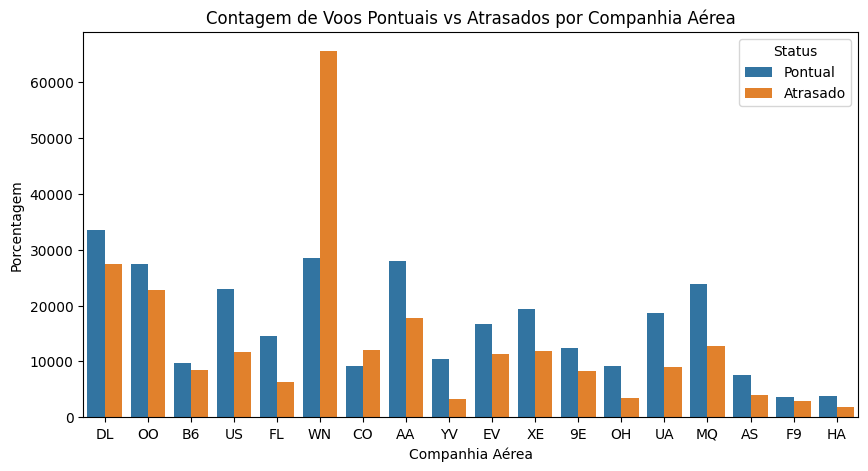

In [ ]:
fig = plt.subplots(figsize=(10, 5))
sns.countplot(x='CiaAerea', hue='Atrasado', data=dados)
plt.xlabel('Companhia Aérea')
plt.ylabel('Porcentagem')
plt.title('Contagem de Voos Pontuais vs Atrasados por Companhia Aérea')
legenda_labels = ['Pontual', 'Atrasado']
plt.legend(title='Status', labels=legenda_labels)
plt.show()

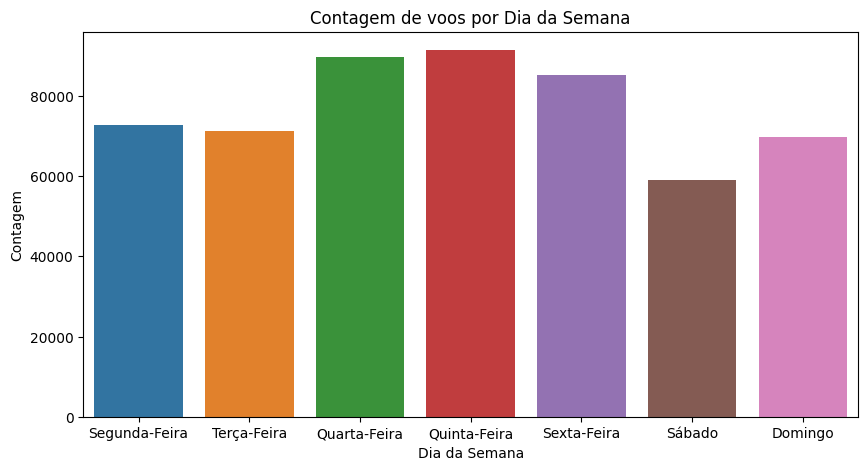

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='DiaDaSemana', data=dados, ax=ax)
ax.set_xticklabels(['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'])
ax.set_xlabel('Dia da Semana')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de voos por Dia da Semana')
plt.show()

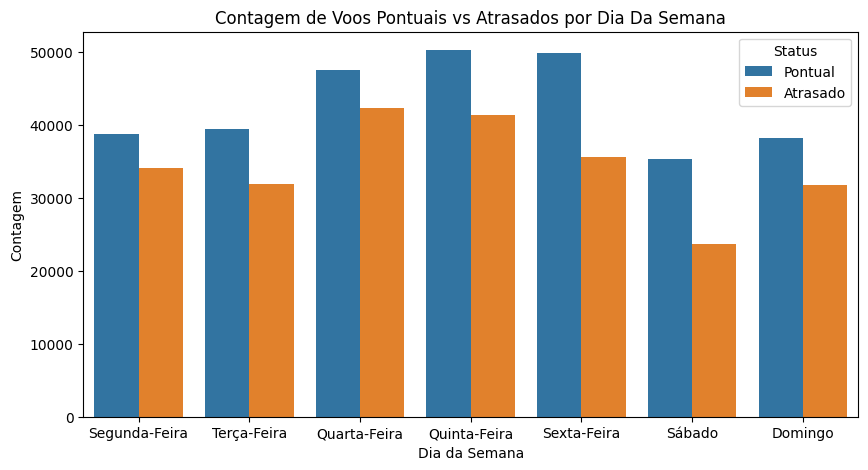

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='DiaDaSemana', hue='Atrasado', data=dados, ax=ax)
ax.set_xticklabels(['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'])
ax.set_xlabel('Dia da Semana')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de Voos Pontuais vs Atrasados por Dia Da Semana')
legenda_labels = ['Pontual', 'Atrasado']
ax.legend(title='Status', labels=legenda_labels)
plt.show()

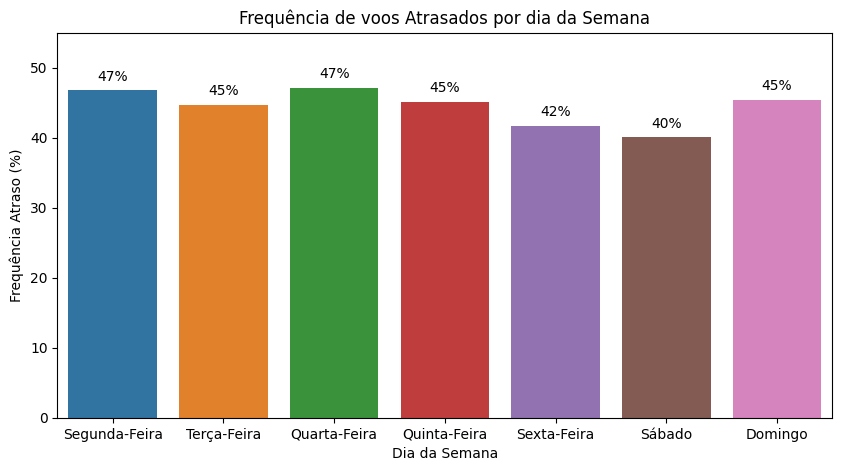

In [ ]:
# Criar a tabela de frequência
tabela_frequencia = pd.crosstab(dados['DiaDaSemana'], dados['Atrasado'], normalize='index') * 100

# Renomear as colunas para 0 e 1
tabela_frequencia.columns = ['0', '1']

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=tabela_frequencia.index, y=tabela_frequencia['1'])

ax.set_xticklabels(['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo'])
ax.set_xlabel('Dia da Semana')
ax.set_ylabel('Frequência Atraso (%)')
ax.set_title('Frequência de voos Atrasados por dia da Semana')
ax.set_ylim(0, 55)

# Função para adicionar as labels dos valores nas barras
def adicionar_labels_barras():
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
adicionar_labels_barras()

plt.show()

### Matriz de Correlação

In [ ]:
## Lista de variaveis categoricas
# cat_cols = dados.select_dtypes(include=['object']).columns.tolist()
# cat_cols

In [ ]:
## Transformando categoricas em numericas
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# for col in cat_cols: 
#     # Encode values in training set
#     le.fit(dados[col])
#     dados[col] = le.transform(dados[col])

In [ ]:
## Visualizando novamente se ainda há variaveis categoricas
# cat_cols = dados.select_dtypes(include=['object']).columns.tolist()
# cat_cols

<ipython-input-31-edf3ea2e20e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr(),annot=True, vmin=-1, vmax=1, cmap='coolwarm')


<Axes: >

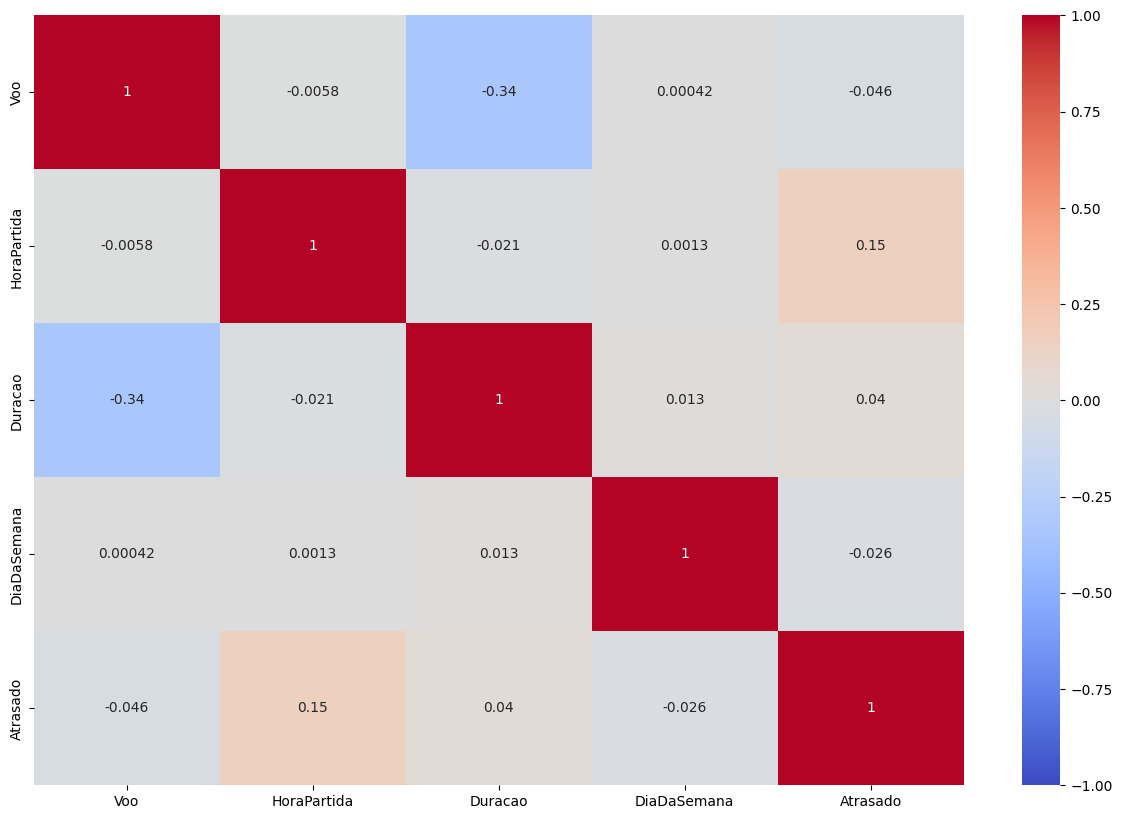

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(dados.corr(),annot=True, vmin=-1, vmax=1, cmap='coolwarm')